# Load prediction of CT1 based on Ambient Conditions
### by analysis of ambient condition, deduce the ideal load of the machine using previous data
5 year data  
convert into single df  
part data into 80:20 ratio (80% training data and 20% test data)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from pandas import ExcelWriter
#from pandas import ExcelFile
df = pd.read_excel('data/Ops Monthly Returns 2016.xls',
                   #skiprows = [0,1,3,4],            
                   #skipfooter= 48, #Number of rows to skip from bottom
                   usecols= "B:F", #Column index in Excel format
                   sheet_name=0)

In [2]:
print(df.columns)

df=df[df["Base_hours"]==24]
df

Index(['Amb_Temp_F', 'Avg_RH_Pct', 'Base_hours', 'Gen_MWH', 'Comp_eff'], dtype='object')


,Amb_Temp_F,Avg_RH_Pct,Base_hours,Gen_MWH,Comp_eff
0,80.70,0.6210,24,1064,85.7
1,81.60,0.6280,24,1057,85.7
2,78.00,0.6310,24,1072,85.7
3,81.00,0.4790,24,1086,85.54
4,81.10,0.4830,24,1087,85.57
...,...,...,...,...,...
270,60.69,0.6341,24,1095,84.48
271,62.30,0.7090,24,1073,84.23
272,62.79,0.7565,24,1056,84.019
273,55.00,0.8900,24,1077,84.01


In [3]:
y=df["Gen_MWH"]
y

0      1064
1      1057
2      1072
3      1086
4      1087
       ... 
270    1095
271    1073
272    1056
273    1077
274    1070
Name: Gen_MWH, Length: 251, dtype: int64

In [4]:
df=df.drop(columns="Gen_MWH")
df

,Amb_Temp_F,Avg_RH_Pct,Base_hours,Comp_eff
0,80.70,0.6210,24,85.7
1,81.60,0.6280,24,85.7
2,78.00,0.6310,24,85.7
3,81.00,0.4790,24,85.54
4,81.10,0.4830,24,85.57
...,...,...,...,...
270,60.69,0.6341,24,84.48
271,62.30,0.7090,24,84.23
272,62.79,0.7565,24,84.019
273,55.00,0.8900,24,84.01


In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 4) (200,)
(51, 4) (51,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

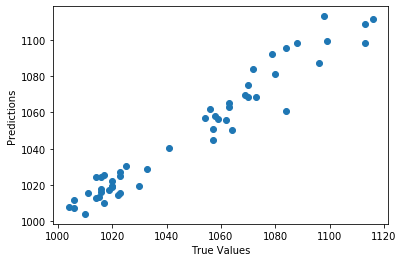

In [7]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [8]:
#d=y_test-predictions
y_test.values-predictions

array([-12.8885709 ,  -0.49073393,  -4.7883108 ,   4.46912869,
         1.23908389,  -0.98883383,   1.47309259,  -0.41863155,
        11.95814026,   7.03358486,   7.61765031, -14.93510184,
        -0.15174856, -10.17615153,   1.16372397,  14.85795343,
        -8.32430622,  -3.09196004,   4.09946183,  -5.61243687,
         4.76838387,   2.45637277,   0.46063717,   1.70978471,
        -2.22250115,  -1.71002335,  -2.21271945,   5.88081445,
        -2.11750127, -12.04630242,  -8.5320226 ,   6.32484753,
        13.85456074,  -1.48389497,   0.04837174,  10.48505488,
        -6.02570484,   7.62193101,  -3.87096232,   8.99495431,
       -10.378903  ,   1.41829198,  -0.31837967,   6.2336885 ,
        -4.46055608,  -5.33797267, -11.55724409,  -5.85785217,
         0.33157025,  23.39674661,   4.61699262])

In [9]:
df=df.drop(columns="Base_hours")
df

,Amb_Temp_F,Avg_RH_Pct,Comp_eff
0,80.70,0.6210,85.7
1,81.60,0.6280,85.7
2,78.00,0.6310,85.7
3,81.00,0.4790,85.54
4,81.10,0.4830,85.57
...,...,...,...
270,60.69,0.6341,84.48
271,62.30,0.7090,84.23
272,62.79,0.7565,84.019
273,55.00,0.8900,84.01


In [10]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 3) (200,)
(51, 3) (51,)


In [11]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)

Text(0, 0.5, 'Predictions')

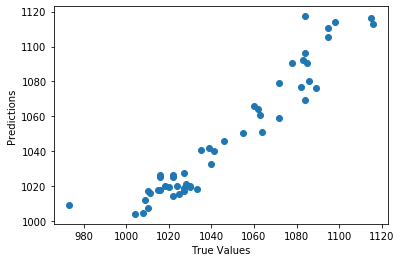

In [12]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:
type(predictions)
predictions=predictions.astype(int)
np.dstack((y_test.values,predictions,(y_test.values-predictions)))

array([[[1041, 1040,    1],
        [1027, 1019,    8],
        [1039, 1041,   -2],
        [1009, 1012,   -3],
        [1084, 1117,  -33],
        [1030, 1020,   10],
        [1025, 1015,   10],
        [1030, 1019,   11],
        [1086, 1080,    6],
        [1011, 1016,   -5],
        [1010, 1007,    3],
        [1015, 1017,   -2],
        [1084, 1096,  -12],
        [1095, 1105,  -10],
        [ 973, 1009,  -36],
        [1022, 1014,    8],
        [1095, 1110,  -15],
        [1085, 1090,   -5],
        [1008, 1004,    4],
        [1004, 1004,    0],
        [1027, 1027,    0],
        [1010, 1017,   -7],
        [1115, 1116,   -1],
        [1046, 1046,    0],
        [1016, 1026,  -10],
        [1116, 1112,    4],
        [1022, 1026,   -4],
        [1018, 1020,   -2],
        [1064, 1050,   14],
        [1063, 1060,    3],
        [1082, 1077,    5],
        [1055, 1050,    5],
        [1022, 1025,   -3],
        [1040, 1033,    7],
        [1027, 1017,   10],
        [1062, 1064,

In [14]:
np.average((y_test.values-predictions))

-0.7647058823529411